<a href="https://colab.research.google.com/github/BrianBehnke/competition/blob/master/BigDataBowl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# Setting urls to the data from https://github.com/nfl-football-ops/Big-Data-Bowl/tree/master/Data
games_url = "https://raw.githubusercontent.com/nfl-football-ops/Big-Data-Bowl/master/Data/games.csv"
players_url = "https://raw.githubusercontent.com/nfl-football-ops/Big-Data-Bowl/master/Data/players.csv"
plays_url = "https://raw.githubusercontent.com/nfl-football-ops/Big-Data-Bowl/master/Data/plays.csv"
gamedata_url = "https://raw.githubusercontent.com/nfl-football-ops/Big-Data-Bowl/master/Data/tracking_gameId_2017091711.csv"

In [0]:
# Placing data into dataframe for games
df_games = pd.read_csv(games_url)
print(df_games.shape)
df_games.head()

(91, 21)


,season,week,gameDate,gameId,gameTimeEastern,HomeScore,VisitorScore,homeTeamAbbr,visitorTeamAbbr,homeDisplayName,...,Stadium,Location,StadiumType,Turf,GameLength,GameWeather,Temperature,Humidity,WindSpeed,WindDirection
0,2017,1,09/10/2017,2017091004,13:00:00,35,23,DET,ARI,Detroit Lions,...,Ford Field,"Detroit, MI",Indoors,Field Turf,03:26:00,Controlled Climate,68.0,70.0,NaN,NaN
1,2017,1,09/07/2017,2017090700,20:30:00,27,42,NE,KC,New England Patriots,...,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,03:37:00,Clear and warm,63.0,77.0,8,SW
2,2017,1,09/10/2017,2017091003,13:00:00,18,21,CLE,PIT,Cleveland Browns,...,FirstEnergy,"Cleveland, Ohio",Outdoor,Grass,02:59:00,Sunny,63.0,53.0,11,East
3,2017,1,09/10/2017,2017091002,13:00:00,0,20,CIN,BAL,Cincinnati Bengals,...,Paul Brown Stadium,"Cincinnati, Ohio",Outdoor,UBU Sports Speed S5-M,02:57:00,Sunny,68.0,43.0,9,SE
4,2017,1,09/10/2017,2017091000,13:00:00,21,12,BUF,NYJ,Buffalo Bills,...,New Era Field,Orchard Park NY,Outdoors,A-Turf Titan,02:54:00,Sun & clouds,65.0,53.0,6,NNE


In [0]:
# Placing data into dataframe for players
df_players = pd.read_csv(players_url)
print(df_players.shape)
df_players.head()

(1713, 10)


,nflId,FirstName,LastName,PositionAbbr,EntryYear,DraftRound,DraftNumber,Height,Weight,College
0,79860,John,Stafford,QB,2009,1.0,1.0,"6'03""",220,Georgia
1,71465,Andre,Smith,T,2009,1.0,6.0,"6'04""",325,Alabama
2,80427,Darrius,Heyward-Bey,WR,2009,1.0,7.0,"6'02""",210,Maryland
3,71269,Michael,Crabtree,WR,2009,1.0,10.0,"6'01""",214,Texas Tech
4,71423,Brian,Orakpo,OLB,2009,1.0,13.0,"6'04""",257,Texas


In [0]:
# Placing data into dataframe for plays
df_plays = pd.read_csv(plays_url)
print(df_plays.shape)
df_plays.head().T

(14193, 27)


,0,1,2,3,4
gameId,2017091004,2017091004,2017091004,2017091004,2017091004
playId,37,73,97,118,153
quarter,1,1,1,1,1
GameClock,15:00:00,14:54:00,14:16:00,13:34:00,12:51:00
down,0,1,2,3,1
yardsToGo,0,10,6,4,10
possessionTeam,DET,ARI,ARI,ARI,ARI
yardlineSide,DET,ARI,ARI,ARI,ARI
yardlineNumber,35,23,27,29,44
offenseFormation,NaN,SHOTGUN,SINGLEBACK,SHOTGUN,SHOTGUN


In [0]:
# Placing data into dataframe for plays
gamedata = pd.read_csv(gamedata_url)
print(gamedata.shape)
gamedata.head(20)



(258888, 14)


,time,x,y,s,dis,dir,event,nflId,displayName,jerseyNumber,team,frame.id,gameId,playId
0,2017-09-17T20:25:32Z,39.96,36.72,0.64,0.01,106.37,NaN,2495211.0,Niles Paul,84.0,away,1,2017091711,36
1,2017-09-17T20:25:32Z,39.97,36.72,0.82,0.01,109.30,NaN,2495211.0,Niles Paul,84.0,away,2,2017091711,36
2,2017-09-17T20:25:32Z,39.98,36.71,1.03,0.02,110.67,NaN,2495211.0,Niles Paul,84.0,away,3,2017091711,36
3,2017-09-17T20:25:32Z,40.01,36.70,1.28,0.03,111.35,NaN,2495211.0,Niles Paul,84.0,away,4,2017091711,36
4,2017-09-17T20:25:32Z,40.05,36.67,1.55,0.05,111.91,NaN,2495211.0,Niles Paul,84.0,away,5,2017091711,36
5,2017-09-17T20:25:32Z,40.15,36.63,1.83,0.11,112.04,NaN,2495211.0,Niles Paul,84.0,away,6,2017091711,36
6,2017-09-17T20:25:33Z,40.30,36.55,2.14,0.16,111.79,NaN,2495211.0,Niles Paul,84.0,away,7,2017091711,36
7,2017-09-17T20:25:33Z,40.50,36.46,2.45,0.22,111.34,NaN,2495211.0,Niles Paul,84.0,away,8,2017091711,36
8,2017-09-17T20:25:33Z,40.74,36.35,2.77,0.27,110.59,NaN,2495211.0,Niles Paul,84.0,away,9,2017091711,36
9,2017-09-17T20:25:33Z,40.98,36.22,3.11,0.27,109.80,NaN,2495211.0,Niles Paul,84.0,away,10,2017091711,36


In [0]:
play36 = gamedata[gamedata['playId'] == 36]

play36

,time,x,y,s,dis,dir,event,nflId,displayName,jerseyNumber,team,frame.id,gameId,playId
0,2017-09-17T20:25:32Z,39.96,36.72,0.64,0.01,106.37,NaN,2495211.0,Niles Paul,84.0,away,1,2017091711,36
1,2017-09-17T20:25:32Z,39.97,36.72,0.82,0.01,109.30,NaN,2495211.0,Niles Paul,84.0,away,2,2017091711,36
2,2017-09-17T20:25:32Z,39.98,36.71,1.03,0.02,110.67,NaN,2495211.0,Niles Paul,84.0,away,3,2017091711,36
3,2017-09-17T20:25:32Z,40.01,36.70,1.28,0.03,111.35,NaN,2495211.0,Niles Paul,84.0,away,4,2017091711,36
4,2017-09-17T20:25:32Z,40.05,36.67,1.55,0.05,111.91,NaN,2495211.0,Niles Paul,84.0,away,5,2017091711,36
5,2017-09-17T20:25:32Z,40.15,36.63,1.83,0.11,112.04,NaN,2495211.0,Niles Paul,84.0,away,6,2017091711,36
6,2017-09-17T20:25:33Z,40.30,36.55,2.14,0.16,111.79,NaN,2495211.0,Niles Paul,84.0,away,7,2017091711,36
7,2017-09-17T20:25:33Z,40.50,36.46,2.45,0.22,111.34,NaN,2495211.0,Niles Paul,84.0,away,8,2017091711,36
8,2017-09-17T20:25:33Z,40.74,36.35,2.77,0.27,110.59,NaN,2495211.0,Niles Paul,84.0,away,9,2017091711,36
9,2017-09-17T20:25:33Z,40.98,36.22,3.11,0.27,109.80,NaN,2495211.0,Niles Paul,84.0,away,10,2017091711,36


In [0]:
niles = play36[play36.displayName == 'Niles Paul']


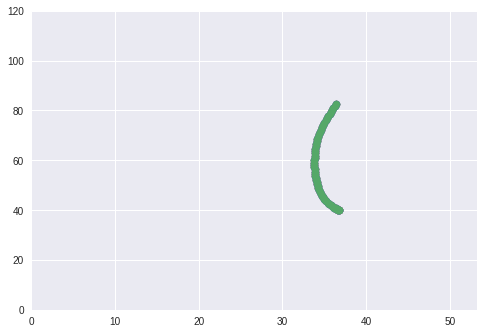

In [0]:
for row in niles:
  plt.scatter(x=niles['y'], y=niles['x'])
  plt.ylim(0,120)
  plt.xlim(0,53.3)